# Seaborn: FacetGrid

In [1]:
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Intro Visuals

In [4]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14)    

In [5]:
sns.set_style('white')

In [6]:
pen_ex = penguins[penguins.species.isin(['Adelie', 'Chinstrap'])]

In [7]:
pen_ex.body_mass_g.describe()

count     219.000000
mean     3710.730594
std       436.250355
min      2700.000000
25%      3400.000000
50%      3700.000000
75%      3987.500000
max      4800.000000
Name: body_mass_g, dtype: float64

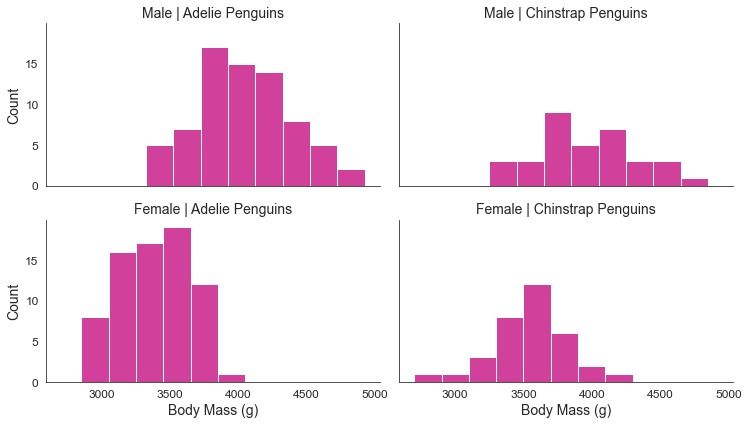

In [8]:
g = sns.FacetGrid(pen_ex, row='sex', col='species', aspect=1.75)
g.map_dataframe(sns.histplot, x='body_mass_g', binwidth=200, color='xkcd:magenta')
g.set_titles(row_template='{row_name}', col_template='{col_name} Penguins')
g.set_axis_labels('Body Mass (g)', "Count")

plt.tight_layout()
#plt.savefig('15facetgrid_thumb.png', dpi=200);

In [9]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10)  

## Basics

In [10]:
sns.set_style('white')

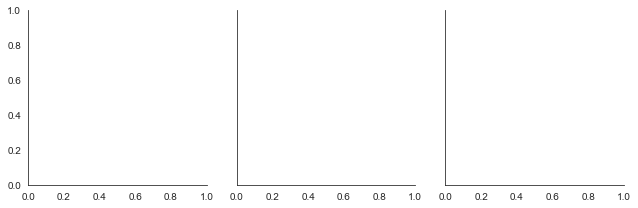

In [11]:
g = sns.FacetGrid(penguins, col='island');

In [12]:
type(g)

seaborn.axisgrid.FacetGrid

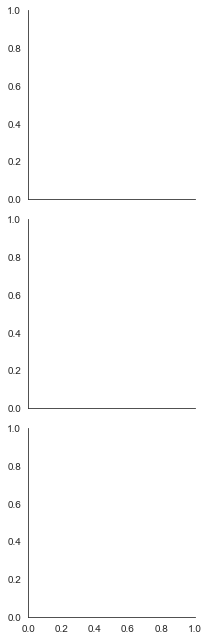

In [13]:
g = sns.FacetGrid(penguins, row='island'); 

### `.map()`

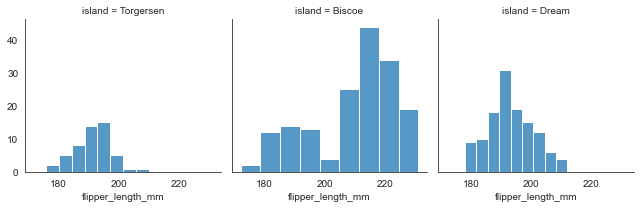

In [14]:
g = sns.FacetGrid(penguins, col='island')
g.map(sns.histplot, "flipper_length_mm");

### `.map_dataframe()`

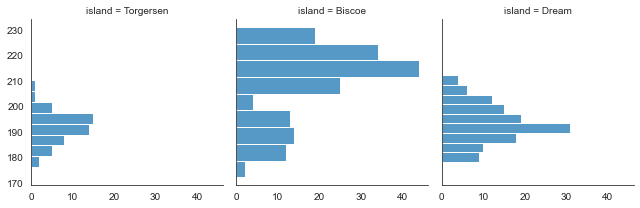

In [15]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.histplot, y='flipper_length_mm'); 

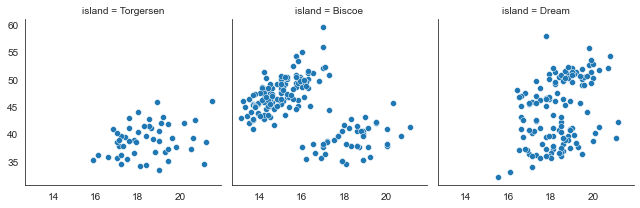

In [16]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm');

## Methods and Attributes

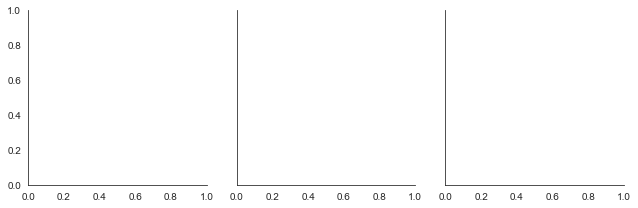

In [17]:
g = sns.FacetGrid(penguins, col='island');

In [18]:
type(g)

seaborn.axisgrid.FacetGrid

In [19]:
#g.  Hit TAB to see properties and methods

### `.set_axis_labels()`

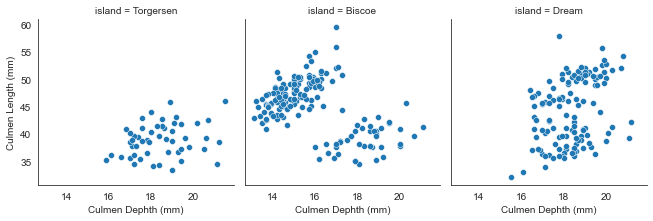

In [20]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm')
g.set_axis_labels('Culmen Dephth (mm)', 'Culmen Length (mm)');

### `.set_titles()`

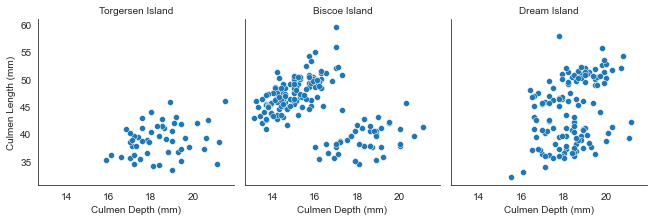

In [21]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm')
g.set_axis_labels('Culmen Depth (mm)', 'Culmen Length (mm)')
g.set_titles(col_template='{col_name} Island');

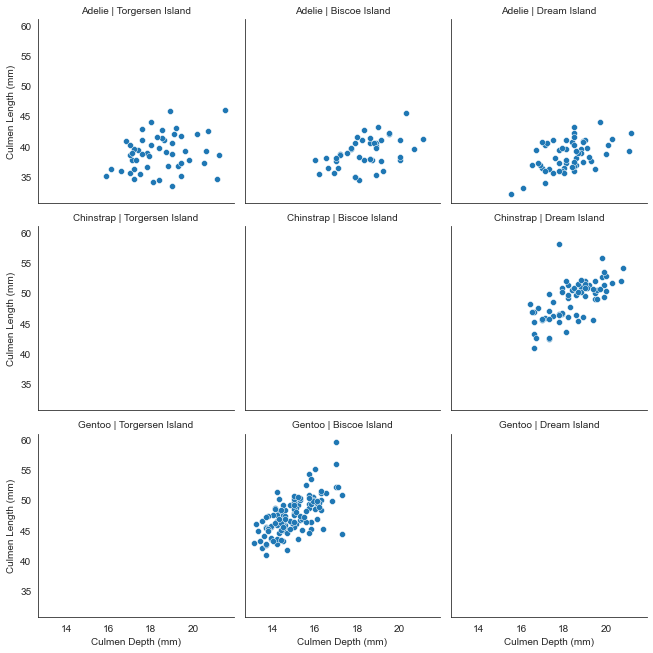

In [22]:
g = sns.FacetGrid(penguins, col='island', row='species')
g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm')
g.set_axis_labels('Culmen Depth (mm)', 'Culmen Length (mm)')
g.set_titles(col_template='{col_name} Island', row_template='{row_name}');

### `sharey, ylim`

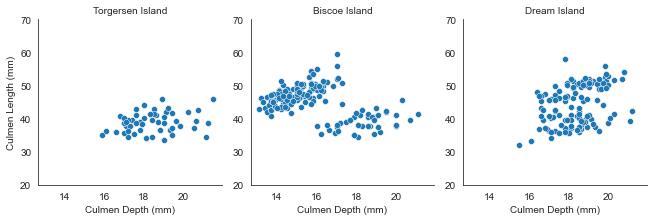

In [23]:
g = sns.FacetGrid(penguins, col='island', sharey=False, ylim=(20, 70))

g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm')
g.set_axis_labels('Culmen Depth (mm)', 'Culmen Length (mm)')
g.set_titles(col_template='{col_name} Island');

## Hue and Custom Functions

### `hue`

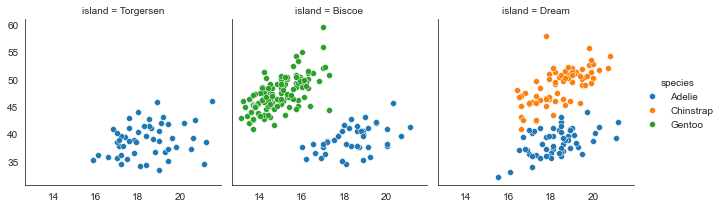

In [24]:
g = sns.FacetGrid(penguins, col='island', hue='species')
g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm')
g.add_legend();

### `palette`

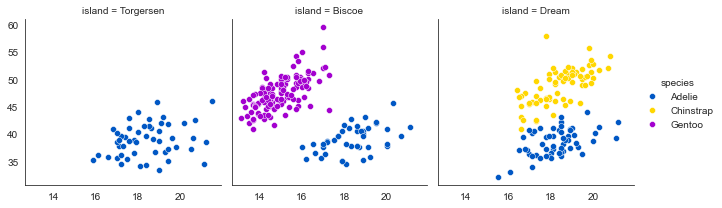

In [25]:
g = sns.FacetGrid(penguins, col='island', hue='species', palette='prism')
g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm') 
g.add_legend();

### Custom Functions

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def add_mean_line(data, var=None, **kws):
    
    # If no variable provided skip adding mean line
    if not var: return
    
    #Calculate mean for each group
    m = np.mean(data[var])
    
    #Get current axis
    ax = plt.gca()
    
    #add line at group mean
    ax.axvline(m, color='maroon', lw=3, ls='--')
    
    #annotate group mean
    x_pos=0.65
    if m > 5000: x_pos=0.2
    ax.text(x_pos, 0.7, f'mean={m:.0f}', 
            transform=ax.transAxes,   #transforms positions to range from (0,0) to (1,1)
            color='maroon', fontweight='bold', fontsize=12)

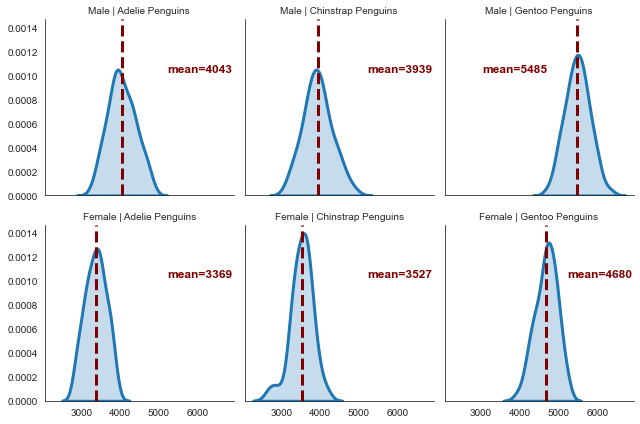

In [28]:
quantity='body_mass_g'

g = sns.FacetGrid(penguins, row='sex', col='species')
g.map_dataframe(sns.kdeplot, x=quantity, lw=3, shade=True)
g.map_dataframe(add_mean_line, var=quantity)
g.set_titles(row_template='{row_name}', col_template='{col_name} Penguins');